# Multiclass Classification

In [60]:
import numpy as np 
from matplotlib import pyplot as plt 
import pandas 

In [61]:
def generate_one_hot(value):
    one_hot = [0.0]*26
    one_hot[value] = 1.0 
    return one_hot


def prepare_dataset(filename):
    a = []
    for i in range(26):
        a.append(i)
    b = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    alphabet = {}
    for i in range(len(b)):
        alphabet[b[i]] = a[i]
    headers = ['LETTER']
    for i in range(1,17):
        headers.append(f'INPUT{i}')
    dataframe = pandas.read_csv(filename,names=headers)
    X = []
    Y = []
    Y_hot = []
    for item, row in dataframe.iterrows():
        X.append([1,row['INPUT1'],row['INPUT2'],row['INPUT3'],row['INPUT4'],row['INPUT5'],row['INPUT6'],row['INPUT7'],row['INPUT8'],
                  row['INPUT9'],row['INPUT10'],row['INPUT11'],row['INPUT12'],row['INPUT13'],row['INPUT14'],row['INPUT15'],row['INPUT16'],
                  ])
        Y.append(row['LETTER'])
    X = np.array(X)
    Y = np.array(Y)

    Y_hot = np.array([generate_one_hot(alphabet[i[0]]) for i in Y])
    return X,Y_hot
        
        

In [62]:
X, Y = prepare_dataset('data/letter-recognition.csv')
print(X.shape)
print(Y.shape)

(20000, 17)
(20000, 26)


In [63]:
print(X[0:10])
print(Y[0:10])

[[ 1  2  8  3  5  1  8 13  0  6  6 10  8  0  8  0  8]
 [ 1  5 12  3  7  2 10  5  5  4 13  3  9  2  8  4 10]
 [ 1  4 11  6  8  6 10  6  2  6 10  3  7  3  7  3  9]
 [ 1  7 11  6  6  3  5  9  4  6  4  4 10  6 10  2  8]
 [ 1  2  1  3  1  1  8  6  6  6  6  5  9  1  7  5 10]
 [ 1  4 11  5  8  3  8  8  6  9  5  6  6  0  8  9  7]
 [ 1  4  2  5  4  4  8  7  6  6  7  6  6  2  8  7 10]
 [ 1  1  1  3  2  1  8  2  2  2  8  2  8  1  6  2  7]
 [ 1  2  2  4  4  2 10  6  2  6 12  4  8  1  6  1  7]
 [ 1 11 15 13  9  7 13  2  6  2 12  1  9  8  1  1  8]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [64]:
def softmax(X):
    k = np.sum(np.exp(X),axis=-1).reshape(-1,1)
    t = 0
    X_out = []
    return np.exp(X) / k
    

In [65]:
softmax(np.array([[1,3,2],
                  [2,1,0]]))

array([[0.09003057, 0.66524096, 0.24472847],
       [0.66524096, 0.24472847, 0.09003057]])

In [66]:
def cce_loss(y_pred,y_true):
    loss = (y_true*np.log(y_pred))
    return -np.sum(loss)/len(y_pred)

In [76]:
def accuracy_calc(forward,Y):
    accuracy = 0
    m = len(forward)
    for i in range(m):
        if(np.argmax(forward[i]) == np.argmax(Y[i])):
            accuracy += 1
    return accuracy/m

EPOCH NUMBER = 0------> loss = 46.866390548794314
EPOCH NUMBER = 100------> loss = 2.334146493553223
EPOCH NUMBER = 200------> loss = 1.3433857856869964
EPOCH NUMBER = 300------> loss = 1.0927489818573166
EPOCH NUMBER = 400------> loss = 0.9828627002834642
EPOCH NUMBER = 500------> loss = 0.9292519823556833
EPOCH NUMBER = 600------> loss = 0.9076402410449227
EPOCH NUMBER = 700------> loss = 0.894766648582566
EPOCH NUMBER = 800------> loss = 0.8883767294953461
EPOCH NUMBER = 900------> loss = 0.8853034228207795
The loss at the end of training is == 0.8877769263883319
The best loss is ==  0.8837410501203999
The accuracy at the end of training is ==  0.7669


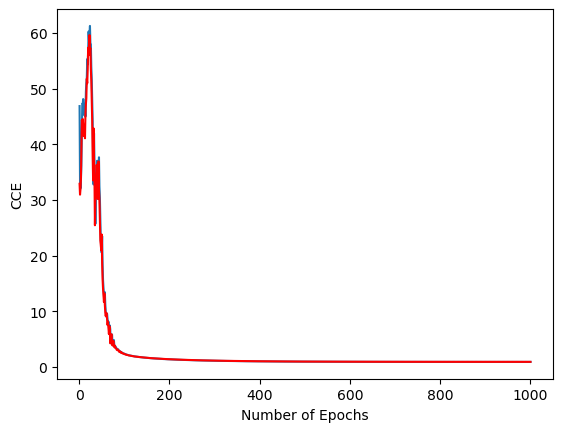

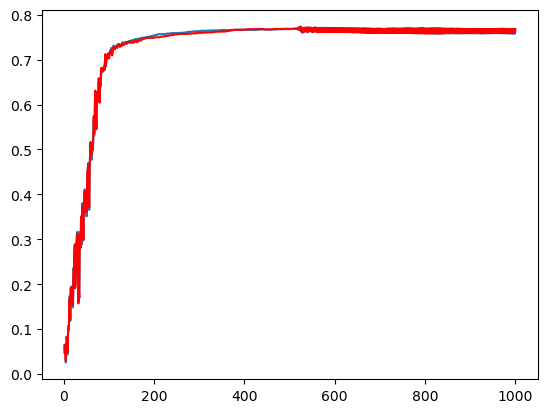

[[ 1.90645394e+00  2.12944016e-01 -1.63492654e+00 -1.49360982e+00
  -2.45577956e+00  3.62829226e-01  9.30268042e-02 -1.37565812e+00
   9.18643094e-01  2.78594950e-01  3.58223113e-01  1.71980786e+00
  -9.71876850e-01 -1.19432358e-01 -1.39490827e+00  5.17603845e-01
  -9.43008541e-01  2.34374673e+00  1.60396168e+00 -5.37708668e-01
  -7.21763184e-02 -3.12102185e+00  1.17795715e+00  2.09968831e+00
  -2.40729847e-01 -9.29263040e-01]
 [-1.68865535e+00 -1.36241864e-02  6.77709346e-01 -1.73850263e-01
  -2.37763371e-01 -2.42555589e-01  2.64570244e-01 -2.84548961e-01
   1.31523446e-01 -5.57262321e-02 -3.07280706e-01 -3.27398860e-01
  -1.10386449e-01 -5.05771480e-01  1.83026011e-01  2.46074666e-01
   7.72086303e-01 -2.69311668e-01 -2.76476735e-01  9.48405491e-01
   7.94846345e-01  4.32070810e-01  2.84921168e-01 -3.67100200e-01
   6.73935630e-01 -1.09616608e-01]
 [ 3.46735509e-01  3.71655837e-02  1.01501878e-01  2.99966955e-01
   6.45877781e-02 -5.63206139e-02  6.89002317e-02 -6.83238818e-02
   1.0

In [79]:
# Implementation of the linear regression algorithm

np.random.seed(20)
X_train = X[0:10000]
Y_train = Y[0:10000]
X_val = X[10000:16000]
Y_val = Y[10000:16000]
X_test = X[16000:]
Y_test = X[16000:]

EPOCHS = 1000 # number of epochs
LR = 1e-5 # Learning Rate
BATCH_SIZE = X.shape[0] # Batch Size
OUTPUT_SIZE = 26
PRINT_FREQUENCY = int(EPOCHS/10)
epsilon = 0.9 

theta = np.random.randn(X.shape[1],OUTPUT_SIZE) # Randomly initialize our theta to the shape of our X
v = np.zeros((X.shape[1],OUTPUT_SIZE))

loss = []
val_loss = []
accuracy = []
val_accuracy = []

best_theta = theta
best_loss = np.inf

for i in range(EPOCHS):
    epoch_loss = 0.0
    epoch_accuracy = 0.0
    for b in range(0, len(X), BATCH_SIZE):
        model_output = softmax(X[b:b+BATCH_SIZE]@theta)
        d_theta = (X[b:b+BATCH_SIZE].T@ (((model_output - Y[b:b+BATCH_SIZE])))) # Calculates the partial derivate of loss in respective to theta
        v =(epsilon*v) - LR*(d_theta)
        theta += v

        epoch_loss += cce_loss(model_output, Y[b:b+BATCH_SIZE])
    if(epoch_loss<best_loss):
        best_loss = epoch_loss
        best_theta = theta
    if(i%PRINT_FREQUENCY == 0):
        print("EPOCH NUMBER = "+str(i) + "------> loss = "+str(epoch_loss))
    loss.append(epoch_loss)
    val_loss.append(cce_loss(softmax(X_val@theta),Y_val))

    accuracy.append(accuracy_calc(softmax(X_train@theta),Y_train))
    val_accuracy.append(accuracy_calc(softmax(X_val@theta), Y_val))

print("The loss at the end of training is ==",loss[-1])
print("The best loss is == ", best_loss)
print("The accuracy at the end of training is == ", accuracy[-1])

plt.plot(range(1, EPOCHS+1),loss)
plt.plot(range(1,EPOCHS+1),val_loss, color='red')
plt.ylabel('CCE')
plt.xlabel('Number of Epochs')
plt.show()

plt.plot(range(1, EPOCHS+1),accuracy)
plt.plot(range(1,EPOCHS+1),val_accuracy, color='red')
plt.show()
print(theta)